In [315]:
import numpy as np
import sklearn.manifold as man
import matplotlib.pyplot as plt
from gensim.models.keyedvectors import KeyedVectors
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import matplotlib
import pickle
import pandas as pd
print(np.__version__)
print(matplotlib.__version__)

1.12.1
2.0.2


In [278]:
np.random.seed(1)

In [279]:
all_embedding =KeyedVectors.load_word2vec_format('./embedding/all_embedding.txt', binary=False)

In [280]:
emoji_dict = pd.read_pickle('./data/SST2/emoji_dict.p')

In [281]:
#build reverse dict, i.e emoji*** : \U****
reverse_emoji_dict = {}
for key,item in emoji_dict.items():
    reverse_emoji_dict[item]=key

In [282]:
all_emojis=reverse_emoji_dict.keys()
emojis,emojis_vectors = list(), []
for e in all_emojis:
    if e in all_embedding.vocab:
        emojis_vectors.append(all_embedding[e])
        emojis.append(e)



In [283]:
len(emojis),len(emojis_vectors)

(1112, 1112)

In [284]:
all_emoticon = [' :) ', ' =) ', ' :( ', ' ;P ', ' ;) ', ' :-D ', ' :D ', ' :-) ', ' ;( ', ' :/ ', ' (: ', ' :-/ ', ' :P ', ':|', ' xD ', " :') ", ' =D ',  ' :] ', ' ;-) ', ' :p ', ' DX ', " :'( ", ' :-P ', ' :@ ', ' =] ', ' :-( ', ' >:( ', ' ;D ', ' XP ', ' 8) ', ' :\\ ',' XD ']


emoticons, vectors = [], []
for e in all_emoticon:
    e = e.strip()
    if e in all_embedding.vocab:
        emoticons.append(e)
        vectors.append(all_embedding[e])

In [285]:
len(emoticons),len(vectors)

(12, 12)

In [286]:
emos = emoticons+emojis
X = np.array(vectors+emojis_vectors)

In [287]:
def rand_jitter(arr):
    stdev = .02*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [288]:
X_embedded =man.TSNE(perplexity=30, n_components=2, init='random', n_iter=4000, learning_rate=300,
                     verbose = True).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1124 samples in 0.012s...
[t-SNE] Computed neighbors for 1124 samples in 0.385s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1124
[t-SNE] Computed conditional probabilities for sample 1124 / 1124
[t-SNE] Mean sigma: 0.027133
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.609501
[t-SNE] Error after 4000 iterations: 0.594575


In [301]:
#default, not good enought
X_embedded =man.TSNE(n_components=2).fit_transform(X)

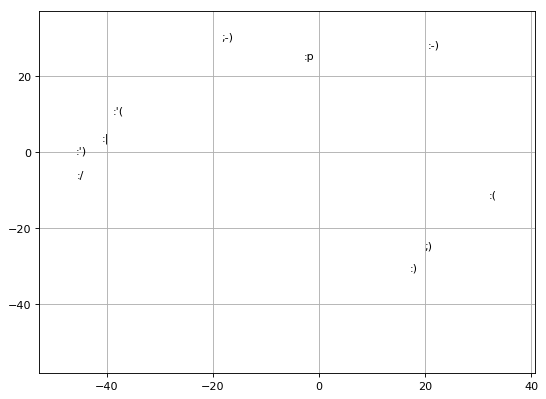

In [302]:
#naive 
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
x, y = zip(*X_embedded)
x = rand_jitter(x)
y = rand_jitter(y)
plt.scatter(x, y, marker='o', alpha=0.0)

for i in range(len(X_embedded))[:10]:
    ax.annotate(emos[i], xy=[x[i],y[i]], xycoords = 'data')
plt.grid()
plt.show()

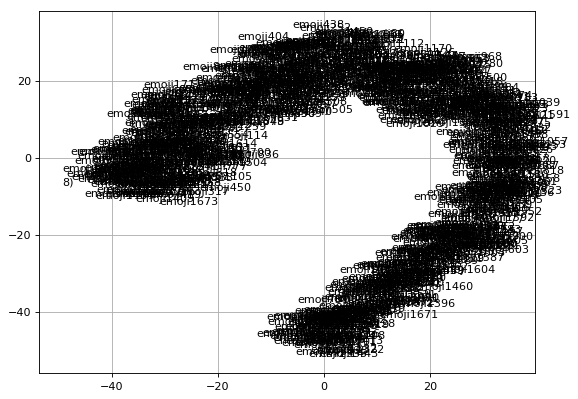

In [303]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
x, y = zip(*X_embedded)
x = rand_jitter(x)
y = rand_jitter(y)
plt.scatter(x, y, marker='o', alpha=0.0)
for i in range(len(X_embedded)):
    ax.annotate(emos[i], xy=[x[i],y[i]], xycoords = 'data')
plt.grid()
plt.show()

# draw frequent emojis + emoticon

In [304]:
emoji_count = pd.read_pickle('./data/SST2/emoji_count.p')

In [305]:
emoji_count.head()

,emoji,count
1078,❤,10884
805,😍,8831
637,🔥,7485
804,😂,5022
592,💋,4917


In [306]:
emoji_alias = pd.read_pickle('./data/SST2/emoji_sort_alias.p')

In [307]:
emoji_alias[0]

'emoji1091'

In [308]:
d=reverse_emoji_dict[emoji_alias[1]]
d

'\\U0001f60d'

In [309]:
d = d.encode('utf-8')
d = d.decode('unicode-escape')
d

'😍'

In [310]:
emos.index(emoji_alias[0])

747

In [311]:
#get index of top 20 emojis by count
emoji20 = emoji_alias[:20]
emoji20_index = [emos.index(i) for i in emoji20 if i in emos]
len(emoji20_index)

19

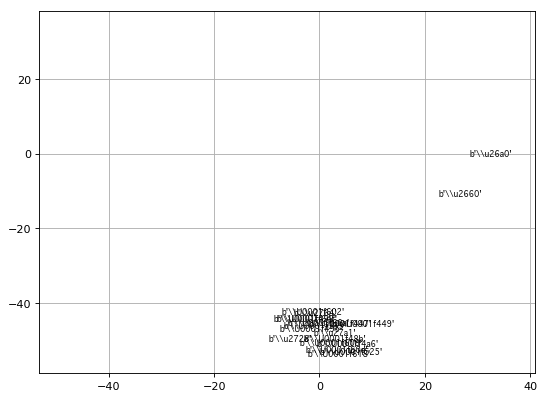

In [312]:
from matplotlib.font_manager import FontProperties


#prop = FontProperties(fname='/Users/nihaozheng/Desktop/NLP/project/model/t-SNE/emojione-apple.ttc')
#plt.rcParams['font.family'] = prop.get_family()

# config the figure for bigger and higher resolution
plt.rcParams["figure.figsize"] = [12.0, 8.0]
plt.rcParams['figure.dpi'] = 300


#plt.rcParams['font.family'] = prop.get_family()
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
x, y = zip(*X_embedded)
x = rand_jitter(x)
y = rand_jitter(y)
plt.scatter(x, y, marker='o', alpha=0.0)

for i in emoji20_index:
    d = reverse_emoji_dict[emos[i]]
    d = d.encode('utf-8')
    #d = d.decode('unicode-escape')
    ax.annotate(d, xy=[x[i],y[i]], xycoords = 'data',fontname='Apple Symbols')
plt.grid()
plt.show()

In [313]:
emoticons,len(emoticons)

([':)', ':(', ';)', ':-)', ':/', ':|', ":')", ';-)', ':p', ":'(", ':-(', '8)'],
 12)

In [314]:
#store to R
unicode2R =emoticons
reserve_x = list(x[:len(emoticons)])
reserve_y=list(y[:len(emoticons)])
for i in emoji40_index:
    d = reverse_emoji_dict[emos[i]]
    d = d.encode('utf-8')
    d = d.decode('unicode-escape')
    unicode2R.append(d)
    reserve_x.append(x[i])
    reserve_y.append(y[i])
    
location2R = pd.DataFrame({'x':reserve_x,'y':reserve_y,'emoji':unicode2R},columns=['x','y','emoji'])
location2R.head()
location2R.to_csv('/Users/nihaozheng/Desktop/NLP/project/model/t-SNE/location2R.csv',index=False)

In [57]:
path = '/Users/nihaozheng/Desktop/NLP/project/model/t-SNE/'
pickle.dump(x, open( path+"x.p", "wb" ) )
pickle.dump(y, open( path+"y.p", "wb" ) )
pickle.dump(emos, open( path+"emos.p", "wb" ) )
pickle.dump(reverse_emoji_dict,open(path+'reverse_emoji_dict.p','wb'))
pickle.dump(emoji40_index,open(path+'emoji40_index.p','wb'))

['😀', '😃', '😄', '😁', '😆', '😅', '😂', '🤣', '☺️', '😊', '😇']


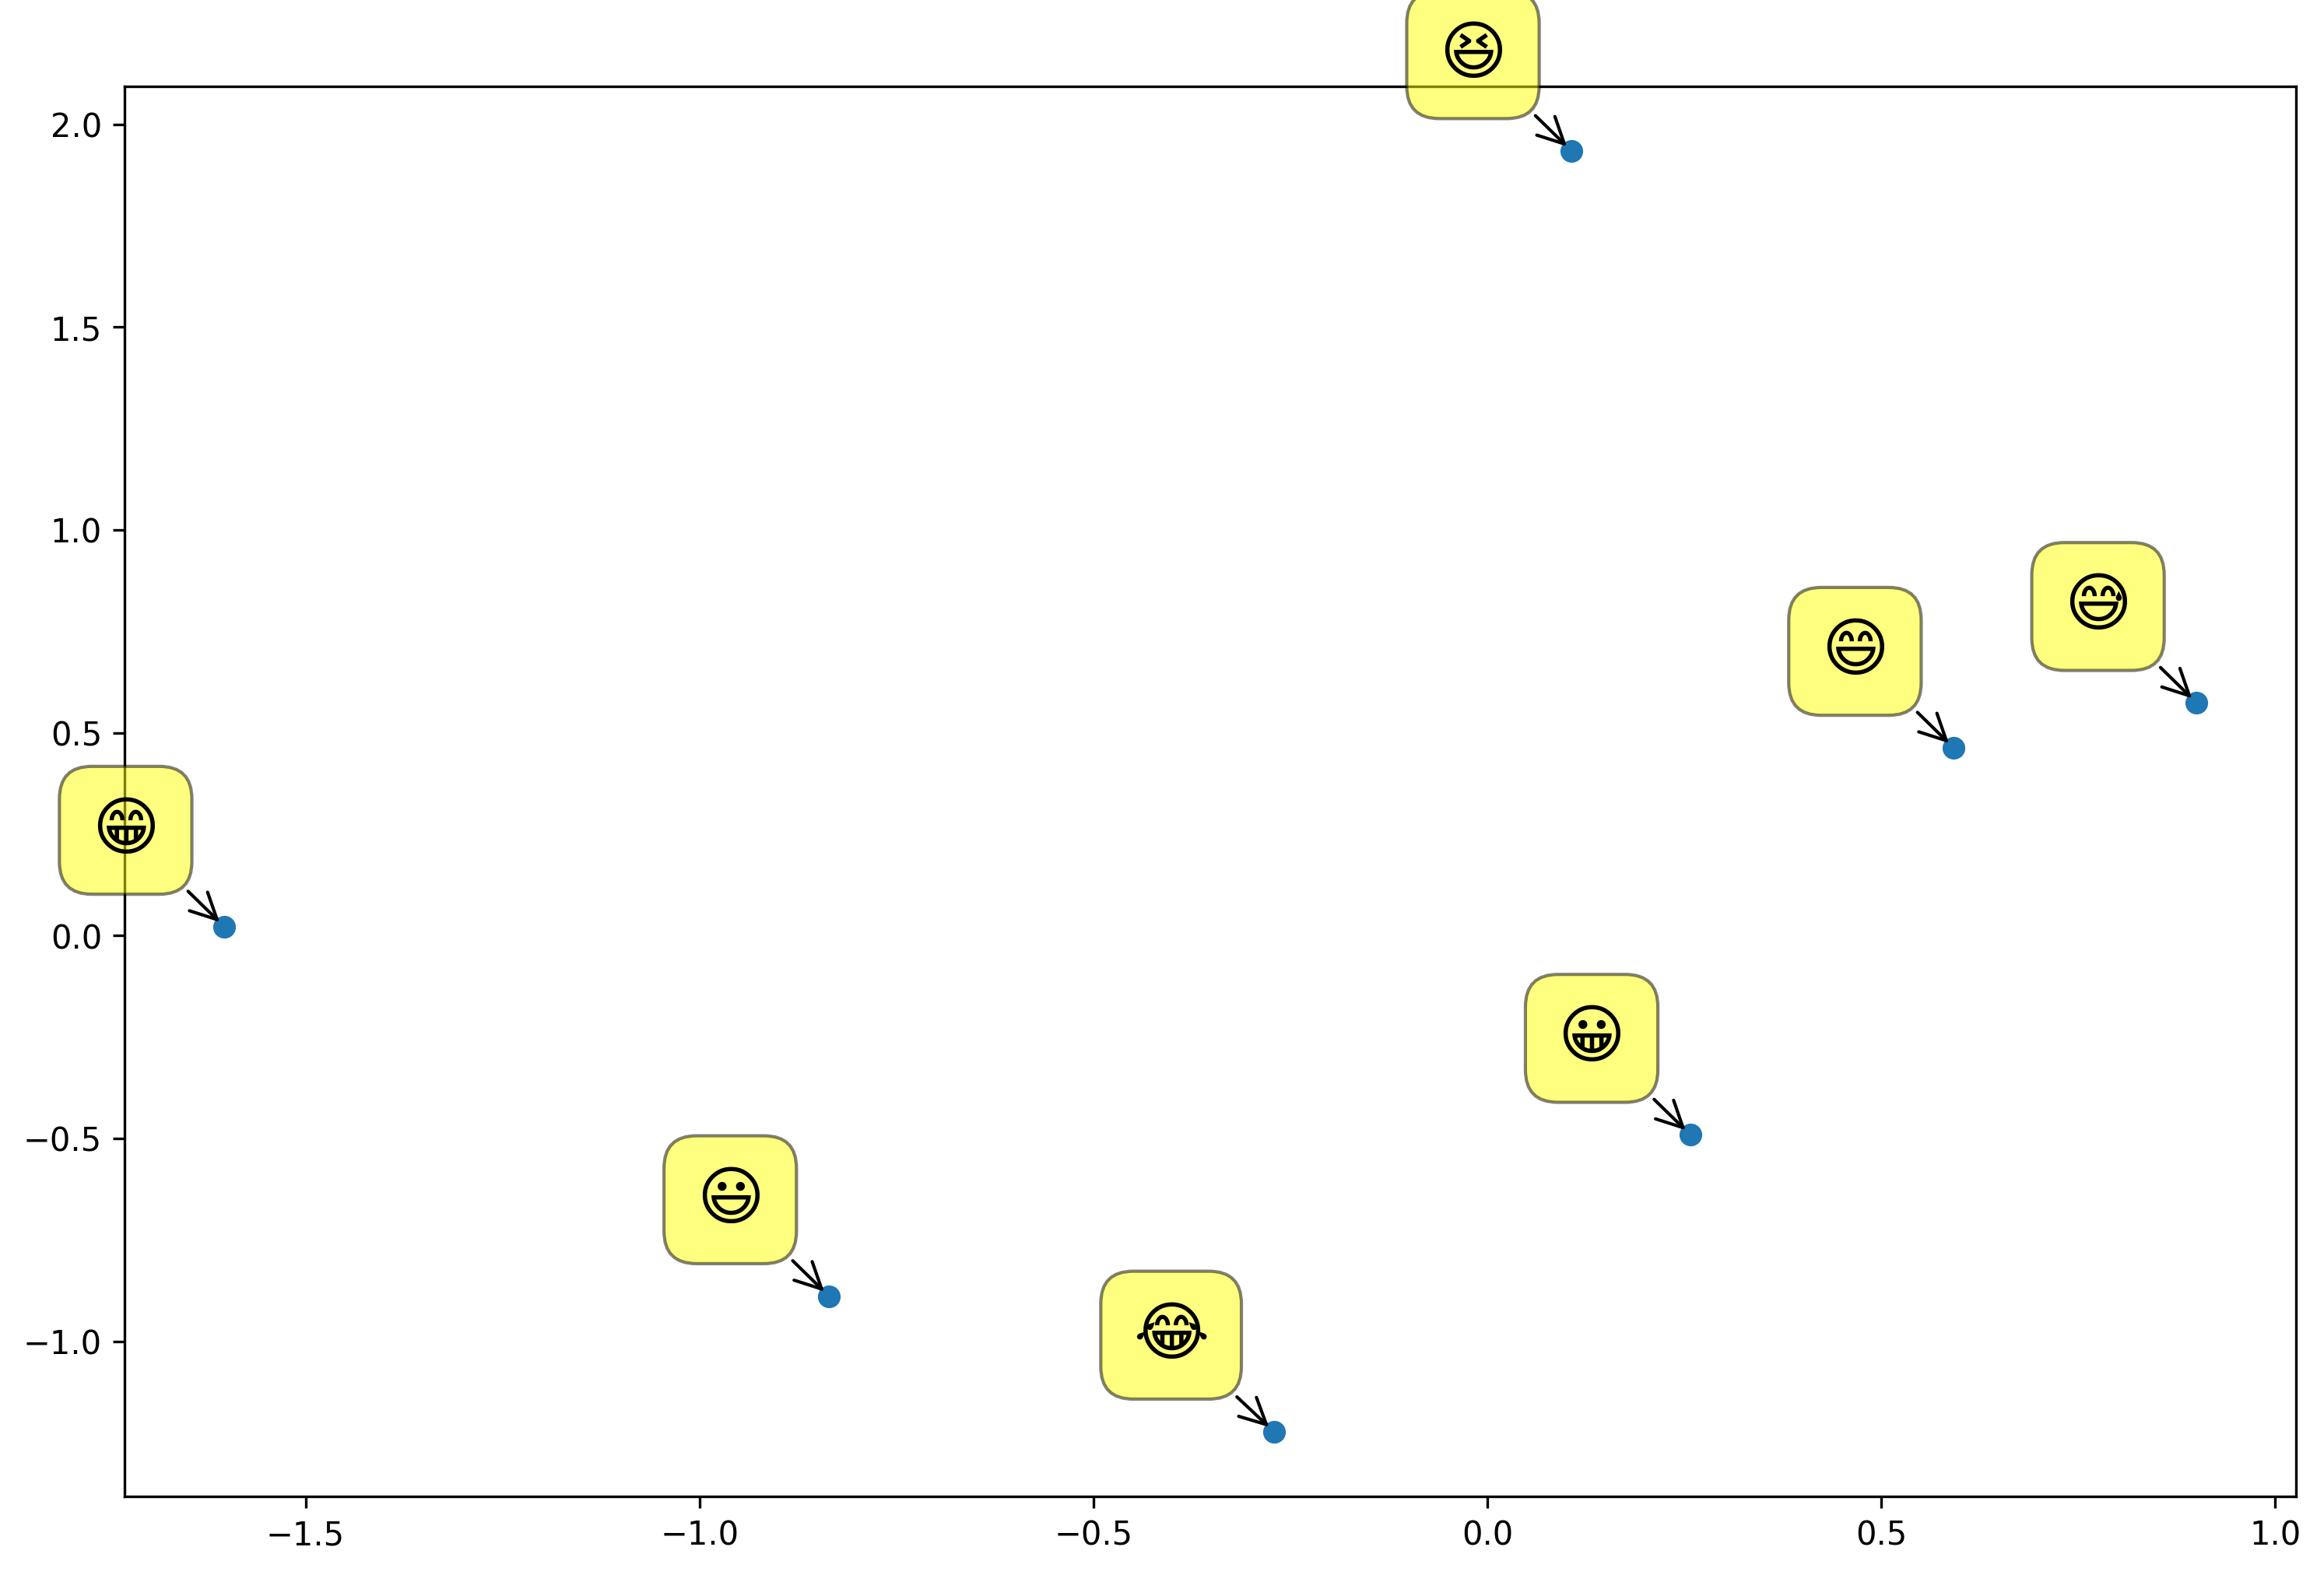

In [74]:
import matplotlib.pyplot as plt
import numpy as np
prop = FontProperties(fname='/Users/nihaozheng/Desktop/NLP/project/model/t-SNE/NotoColorEmoji.ttc',size='large')
plt.rcParams['font.family'] = prop.get_family()
# config the figure for bigger and higher resolution
plt.rcParams["figure.figsize"] = [12.0, 8.0]
plt.rcParams['figure.dpi'] = 300
data = np.random.randn(7, 2)
plt.scatter(data[:, 0], data[:, 1])
labels = '😀 😃 😄 😁 😆 😅 😂 🤣 ☺️ 😊 😇'.split()
print(labels)
for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label, # some of these contain Emojis
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'),
     # this is the param added
        fontsize=20)
plt.show()

In [96]:
import matplotlib
all_font = matplotlib.font_manager.findSystemFonts(fontpaths='/System/Library/Fonts/', fontext='ttf')



In [97]:
for i in all_font:
    if 'emo' in i:
        print(i)

In [98]:
all_font

['/System/Library/Fonts/SFCompactDisplay-Black.otf',
 '/System/Library/Fonts/SFCompactRounded-Light.otf',
 '/System/Library/Fonts/SFCompactText-Light.otf',
 '/System/Library/Fonts/SFNSDisplayCondensed-Ultralight.otf',
 '/System/Library/Fonts/SFCompactDisplay-Regular.otf',
 '/System/Library/Fonts/SFNSDisplay.ttf',
 '/System/Library/Fonts/SFNSDisplay-BlackItalic.otf',
 '/System/Library/Fonts/SFCompactText-Heavy.otf',
 '/System/Library/Fonts/SFCompactText-Regular.otf',
 '/System/Library/Fonts/SFNSDisplay-UltralightItalic.otf',
 '/System/Library/Fonts/SFCompactText-Bold.otf',
 '/System/Library/Fonts/SFNSDisplay-MediumItalic.otf',
 '/System/Library/Fonts/SFCompactText-BoldItalic.otf',
 '/System/Library/Fonts/SFNSTextCondensed-Semibold.otf',
 '/System/Library/Fonts/SFCompactRounded-Heavy.otf',
 '/System/Library/Fonts/SFCompactDisplay-Medium.otf',
 '/System/Library/Fonts/SFNSDisplayCondensed-Semibold.otf',
 '/System/Library/Fonts/SFNSDisplayCondensed-Bold.otf',
 '/System/Library/Fonts/SFNSDis

In [109]:
from emojipy import Emoji

In [108]:
import emojipy

In [115]:
# Pdf doesn't need any unicode inside <image>'s alt attribute
from reportlab.platypus import Paragraph
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.pdfgen import canvas
from reportlab.rl_config import defaultPageSize
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from emojipy import Emoji
import re
Emoji.unicode_alt = False


def replace_with_emoji_pdf(text, size):
    """
    Reportlab's Paragraph doesn't accept normal html <image> tag's attributes
    like 'class', 'alt'. Its a little hack to remove those attrbs
    """

    text = Emoji.to_image(text)
    text = text.replace('class="emojione"', 'height=%s width=%s' %
                        (size, size))
    return re.sub('alt="'+Emoji.shortcode_regexp+'"', '', text)

# Register font 'font_file' is location of symbola.ttf file

font_file = 'Symbola.ttf'
symbola_font = TTFont('Symbola', font_file)
pdfmetrics.registerFont(symbola_font)

width, height = defaultPageSize
pdf_content = "It's emoji time \u263A \U0001F61C. Let's add some cool emotions \U0001F48F \u270C. And some more \u2764 \U0001F436"

styles = getSampleStyleSheet()
styles["Title"].fontName = 'Symbola'
style = styles["Title"]
content = replace_with_emoji_pdf(Emoji.to_image(pdf_content), style.fontSize)



In [116]:
content

'It\'s emoji time <img class="emojione " style=""  src="https://cdn.jsdelivr.net/emojione/assets/3.0/png/64/263a.png"/> <img class="emojione " style=""  src="https://cdn.jsdelivr.net/emojione/assets/3.0/png/64/1f61c.png"/>. Let\'s add some cool emotions <img class="emojione " style=""  src="https://cdn.jsdelivr.net/emojione/assets/3.0/png/64/1f48f.png"/> <img class="emojione " style=""  src="https://cdn.jsdelivr.net/emojione/assets/3.0/png/64/270c.png"/>. And some more <img class="emojione " style=""  src="https://cdn.jsdelivr.net/emojione/assets/3.0/png/64/2764.png"/> <img class="emojione " style=""  src="https://cdn.jsdelivr.net/emojione/assets/3.0/png/64/1f436.png"/>'

In [1]:
import pickle

In [ ]:
import pandas as pd
pd.read_picklep('')